In [4]:
# Requerimentos
!pip install pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from typing import Iterable

In [6]:
# Constants
# Q_* == Question
# A_* == Answer
# UA_* == Unified Answer

Q_ASSIGNMENT_COMPLETED = "Você concluiu o TP?"
A_YES_SATISFIED = "Sim, e estou satisfeito com o resultado"
A_YES_UNSATISFIED = "Sim, mas não estou contente com o resultado"
A_NO_UNFINISHED = "Não, porque não consegui implementar tudo que foi pedido"
A_NO_UNMOTIVATED = "Não, porque problemas técnicos me desmotivaram a desenvolver o jogo"
UA_YES = (A_YES_SATISFIED, A_YES_UNSATISFIED)
UA_NO = (A_NO_UNFINISHED, A_NO_UNMOTIVATED)

Q_PRE_ASSIGNMENT_FEELING =  "Quando você ficou sabendo que o Trabalho Prático envolveria o desenvolvimento de um jogo, como você se sentiu?"
A_EXCITED = "Animado(a)"
A_INDIFFERENT = "Indiferente"
A_WORRIED = "Preocupado(a)"

Q_TOOK_BRENNOS_CLASS = "Você participou da aula de laboratório de introdução à biblioteca JOGO.H lecionada pelo Brenno?"
A_YES = "Sim"
A_NO = "Não"

Q_FEELING = "Em geral, qual foi o seu sentimento sobre o Trabalho Prático?"
A_POSITIVE = "Positivo, o desenvolvimento de um jogo me deixou mais animado(a) e me fez aprender mais"
A_NEGATIVE = "Negativo, os problemas técnicos e/ou a complexidade do trabalho me deixou mais frustrado(a) do que animado(a)"

Q_WHAT_OS = "Qual Sistema Operacional você utilizou durante a maioria do desenvolvimento do trabalho?"
A_WINDOWS = "Windows"
A_LINUX = "Linux"
A_MAC = "Mac"

Q_GENERAL_TECH_ISSUES = "De forma mais específica, selecione as opções com as quais você se identifica [Eu tive dificuldades técnicas para usar/instalar a biblioteca]"
A_AGREE = "Concordo"
A_NA = "Neutro/Não se aplica"
A_DISAGREE = "Não concordo"

Q_GENERAL_EXCITEMENT = "De forma mais específica, selecione as opções com as quais você se identifica [Eu estive animado(a) durante a maior parte do desenvolvimento do jogo]"
# A_AGREE, A_NA, A_DISAGREE

Q_GENERAL_BRENNO_HELPED = "De forma mais específica, selecione as opções com as quais você se identifica [O Brenno conseguiu me ajudar com minhas dúvidas]"
# A_AGREE, A_NA, A_DISAGREE

Q_GENERAL_PROFESSOR_HELPED = "De forma mais específica, selecione as opções com as quais você se identifica [O professor conseguiu me ajudar com minhas dúvidas]"
# A_AGREE, A_NA, A_DISAGREE

Q_GENERAL_OTHERS_HELPED = "De forma mais específica, selecione as opções com as quais você se identifica [Os monitores conseguiram me ajudar com minhas dúvidas]"
# A_AGREE, A_NA, A_DISAGREE

Q_MORE_COMPLEX = "Na sua opinião, você diria que o TP ficou mais complexo por se tratar do desenvolvimento de um jogo?"
A_YES_FORTUNATELY = "Sim, porém eu acho que a complexidade é um ponto positivo"
A_YES_UNFORTUNATELY = "Sim, e por isso eu me frustrei durante o desenvolvimento"
A_NO_NOT_THE_GAME = "Não, acredito que a complexidade veio de programar em geral e não está diretamente relacionada com o desenvolvimento de um jogo"
A_NO_NOT_COMPLEX = "Não, o trabalho não foi complexo"
UA_GAMES_NOT_TO_BLAME = (A_YES_FORTUNATELY, A_NO_NOT_THE_GAME, A_NO_NOT_COMPLEX)

Q_CLASS_DIFFICULTY = "Sobre os seus colegas de turma, você diria que eles tiveram muitas dificuldades com o desenvolvimento do jogo?"
A_YES_LOTS = "Sim, acho que a maioria teve muitas dificuldades no desenvolvimento"
A_YES_FEW = "Sim, acho que alguns tiveram muitas dificuldades, mas não a maioria"
A_NO_EASY = "Não, acho que até houve dificuldades, mas a maioria conseguiu superá-las sem problemas"
UA_DIFFICULTIES = (A_YES_LOTS, A_YES_FEW)

Q_TIME_TRAVEL = "Se você pudesse voltar no tempo e pudesse alterar o TP, você alteraria?\n\nImagine que este outro ainda envolveria alocações, structs e manipulação de arquivo, porém não seria um jogo. Por exemplo, poderia ser uma interface de caixa de supermercado no terminal."
A_YES_BETTER_GRADE = "Sim, porque eu gostaria de obter uma nota maior"
A_YES_COMPLEXITY = "Sim, porque a complexidade do jogo piorou o trabalho"
A_NO_GAMES_NOT_TO_BLAME = "Não, apesar de ter tido dificuldades, elas ainda estariam presentes em outro trabalho"
A_NO_IM_HAPPY = "Não, acho que o desenvolvimento de um jogo me fez aprender mais e me trouxe uma experiência positiva"
UA_TIME_TRAVEL_YES = (A_YES_BETTER_GRADE, A_YES_COMPLEXITY)
UA_TIME_TRAVEL_NO = (A_NO_GAMES_NOT_TO_BLAME, A_NO_IM_HAPPY)

Q_LIB_PROBLEMS = "Imagine que todos os problemas de instalação da biblioteca foram resolvidos. Você acha que isso mudaria o seu sentimento sobre o trabalho prático?"
A_LIB_PROBLEMS_YES = "Sim, acho que a grande maioria dos problemas que eu e meus colegas encontraram foram relacionados à instalação"
A_LIB_PROBLEMS_NO = "Não, acho que os problemas vão além de instalar a biblioteca"
A_LIB_PROBLEMS_NA = "Não tive problemas de instalação"

Q_FUTURE_USAGE = "Falando sobre a biblioteca, agora que o TP foi entregue, você ainda pretende usar a biblioteca para fazer jogos? (Múltipla escolha)"
A_YES_PERSONAL_PROJECTS = "Acho que vou usar a biblioteca para fazer projetos pessoais"
A_YES_OTHER_DISCIPLINES = "Acho que vou usar a biblioteca para desenvolver trabalhos em outras disciplinas"
A_NO_NEVER = "Não pretendo mais usar a biblioteca"
UA_WILL_USE_SOMEHOW = (A_YES_PERSONAL_PROJECTS, A_YES_OTHER_DISCIPLINES)


In [7]:
def answer_idx_to_count(df, column):
    def inner(idx):
        if isinstance(idx, Iterable) and not isinstance(idx, str):
            return [
                inner(inner_idx)
                for inner_idx in idx
            ]
        
        return len(df[df[column] == idx])
    
    return inner

In [8]:
def plot_stacked_pie_charts(ax, df, column, answer_indices, inner_colors, outer_colors, title, outer_labels=None, **kwargs):

    if isinstance(answer_indices[0], Iterable):
        max_length = max(len(sub_idx) for sub_idx in answer_indices)

        for sub_idx in answer_indices:
            sub_idx.extend([np.NaN] * (max_length - len(sub_idx)))

    values = np.array(answer_idx_to_count(df, column)(answer_indices))

    outer_radius = 1.0# 2.0
    inner_radius = 0.7# 1.5
    radius_diff = outer_radius - inner_radius

    common = {
        "wedgeprops": {"width": radius_diff},
        "pctdistance": 0.8,
        "autopct": "%1.2f%%"
    }

    ax.pie(values.sum(axis=1), radius=outer_radius, colors=outer_colors, labels=outer_labels, **common, **kwargs)
    ax.pie(values.flatten(), radius=inner_radius, colors=inner_colors, **common, **kwargs)

    ax.set(aspect="equal", title=title)

In [9]:
def figure_wide_legend(fig, colors, labels, **kwargs):
    fig.legend(
        handles=[
            Line2D([0], [0], color=c, label=l, marker='o')
            for l, c in zip(labels, colors)
        ],
        **kwargs
    )

In [10]:
all_users = pd.read_csv("Pesquisa JOGO.H.csv")

In [11]:
windows_users = all_users[all_users[Q_WHAT_OS] == A_WINDOWS]
linux_users = all_users[all_users[Q_WHAT_OS] == A_LINUX]
mac_users = all_users[all_users[Q_WHAT_OS] == A_MAC]

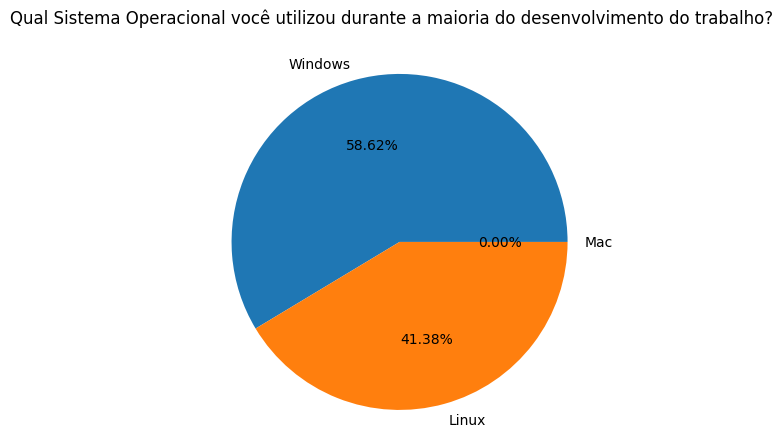

In [12]:
labels = A_WINDOWS, A_LINUX, A_MAC
sizes = [len(windows_users), len(linux_users), len(mac_users)]

fig, ax = plt.subplots()
fig.suptitle(Q_WHAT_OS)
ax.pie(sizes, labels=labels, autopct="%1.2f%%")
ax.axis('equal')
plt.show()

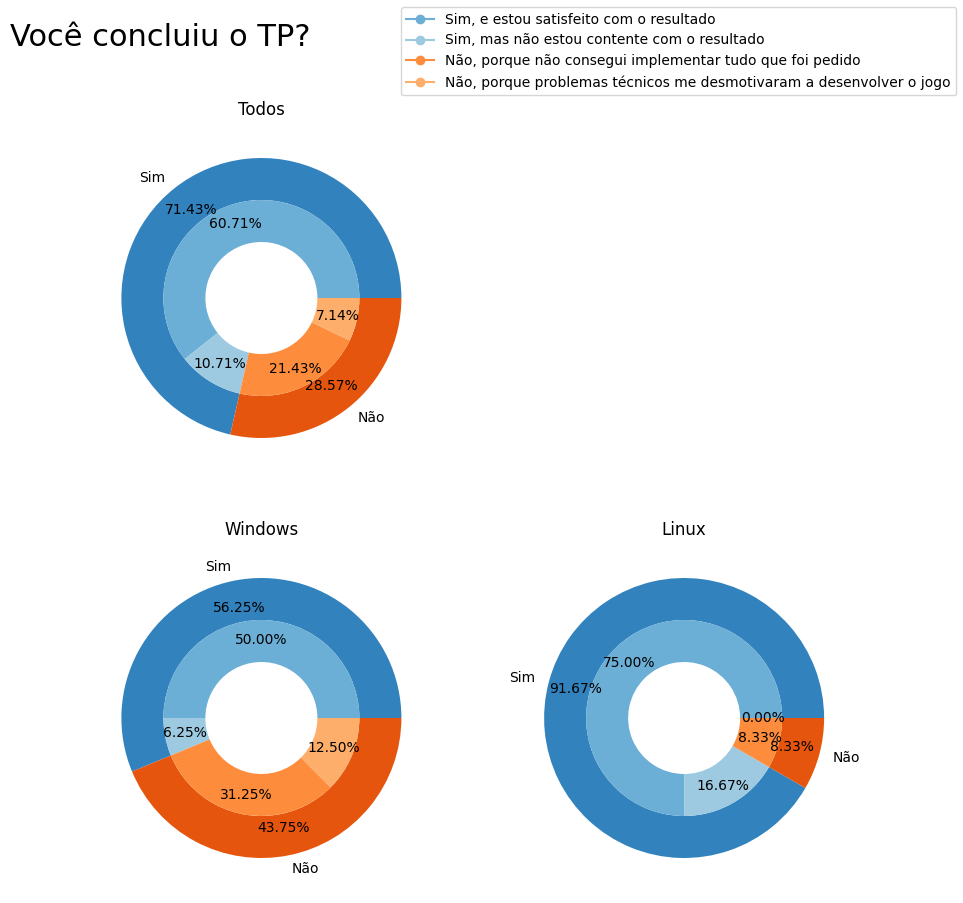

In [13]:
fig, ((general_ax, placeholder_ax), (windows_ax, linux_ax)) = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(Q_ASSIGNMENT_COMPLETED, x=0.2, fontsize=22)

# ---------

outer_labels = "Sim", "Não"
inner_labels = A_YES_SATISFIED, A_YES_UNSATISFIED, A_NO_UNFINISHED, A_NO_UNMOTIVATED
answer_indices = [A_YES_SATISFIED, A_YES_UNSATISFIED], [A_NO_UNFINISHED, A_NO_UNMOTIVATED]

inner_radius = 0.7
outer_radius = 1.0

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3) * 4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

# ---------

plot_stacked_pie_charts(general_ax, all_users, Q_ASSIGNMENT_COMPLETED, answer_indices, inner_colors, outer_colors, "Todos", outer_labels=outer_labels)
plot_stacked_pie_charts(windows_ax, windows_users, Q_ASSIGNMENT_COMPLETED, answer_indices, inner_colors, outer_colors, "Windows", outer_labels=outer_labels)
plot_stacked_pie_charts(linux_ax, linux_users, Q_ASSIGNMENT_COMPLETED, answer_indices, inner_colors, outer_colors, "Linux", outer_labels=outer_labels)

placeholder_ax.set_axis_off()

figure_wide_legend(fig, inner_colors, inner_labels, loc="upper right")

plt.show()

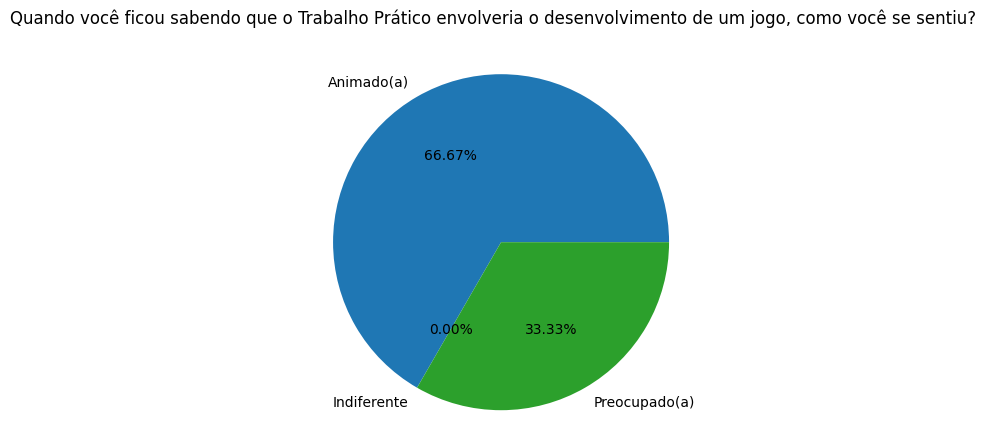

In [14]:
labels = A_EXCITED, A_INDIFFERENT, A_WORRIED
sizes = [
    len(all_users[all_users[Q_PRE_ASSIGNMENT_FEELING] == l])
    for l in labels
]

fig, ax = plt.subplots()
fig.suptitle(Q_PRE_ASSIGNMENT_FEELING)
ax.pie(sizes, labels=labels, autopct="%1.2f%%")
ax.axis('equal')
plt.show()

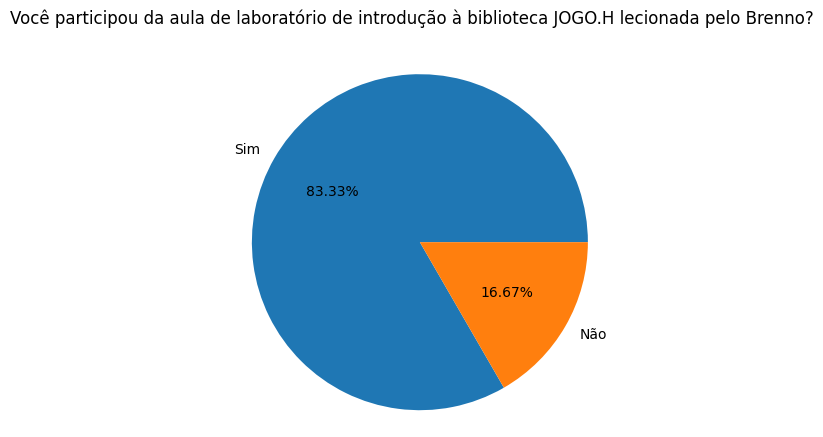

In [15]:
labels = A_YES, A_NO
sizes = [
    len(all_users[all_users[Q_TOOK_BRENNOS_CLASS] == l])
    for l in labels
]

fig, ax = plt.subplots()
fig.suptitle(Q_TOOK_BRENNOS_CLASS)
ax.pie(sizes, labels=labels, autopct="%1.2f%%")
ax.axis('equal')
plt.show()

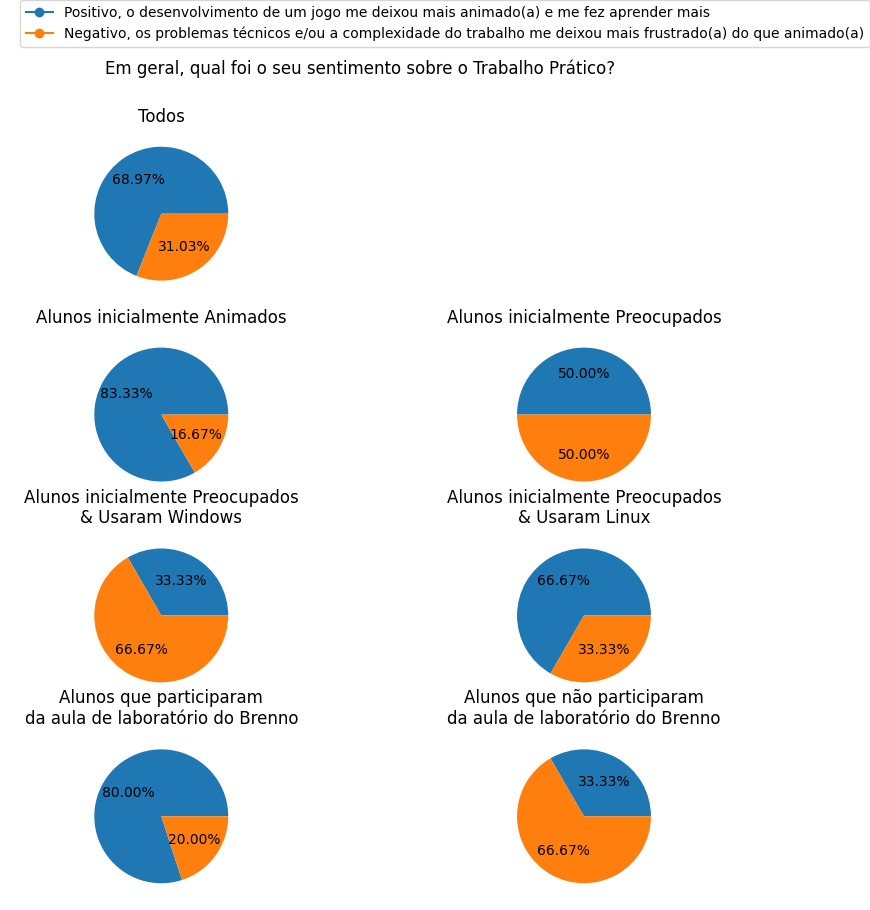

In [16]:
excited_users = all_users[all_users[Q_PRE_ASSIGNMENT_FEELING] == A_EXCITED]
worried_users = all_users[all_users[Q_PRE_ASSIGNMENT_FEELING] == A_WORRIED]

labels = A_POSITIVE, A_NEGATIVE

fig, ((general_ax, placeholder_ax), (excited_ax, worried_ax), (worried_windows_ax, worried_linux_ax), (participants_ax, non_participants_ax)) = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle(Q_FEELING, y=0.95)

ordered_feelings = lambda df: df[Q_FEELING].value_counts().sort_index(ascending=False)

general_ax.pie(ordered_feelings(all_users), autopct="%1.2f%%")
general_ax.set_title("Todos")

excited_ax.pie(ordered_feelings(excited_users), autopct="%1.2f%%")
excited_ax.set_title("Alunos inicialmente Animados")

worried_ax.pie(ordered_feelings(worried_users), autopct="%1.2f%%")
worried_ax.set_title("Alunos inicialmente Preocupados")

worried_windows_users = pd.merge(windows_users, worried_users, how="inner")
worried_linux_users = pd.merge(linux_users, worried_users, how="inner")

worried_windows_ax.pie(ordered_feelings(worried_windows_users), autopct="%1.2f%%")
worried_windows_ax.set_title("Alunos inicialmente Preocupados\n& Usaram Windows")

worried_linux_ax.pie(ordered_feelings(worried_linux_users), autopct="%1.2f%%")
worried_linux_ax.set_title("Alunos inicialmente Preocupados\n& Usaram Linux")

participants_users = all_users[all_users[Q_TOOK_BRENNOS_CLASS] == A_YES]
non_participants_users = all_users[all_users[Q_TOOK_BRENNOS_CLASS] == A_NO]

participants_ax.pie(ordered_feelings(participants_users), autopct="%1.2f%%")
participants_ax.set_title("Alunos que participaram\nda aula de laboratório do Brenno")

non_participants_ax.pie(ordered_feelings(non_participants_users), autopct="%1.2f%%")
non_participants_ax.set_title("Alunos que não participaram\nda aula de laboratório do Brenno")

placeholder_ax.set_axis_off()

figure_wide_legend(fig, ("#1F77B4", "#FF7F0E"), labels,  loc="upper right", borderaxespad=0)

plt.show()

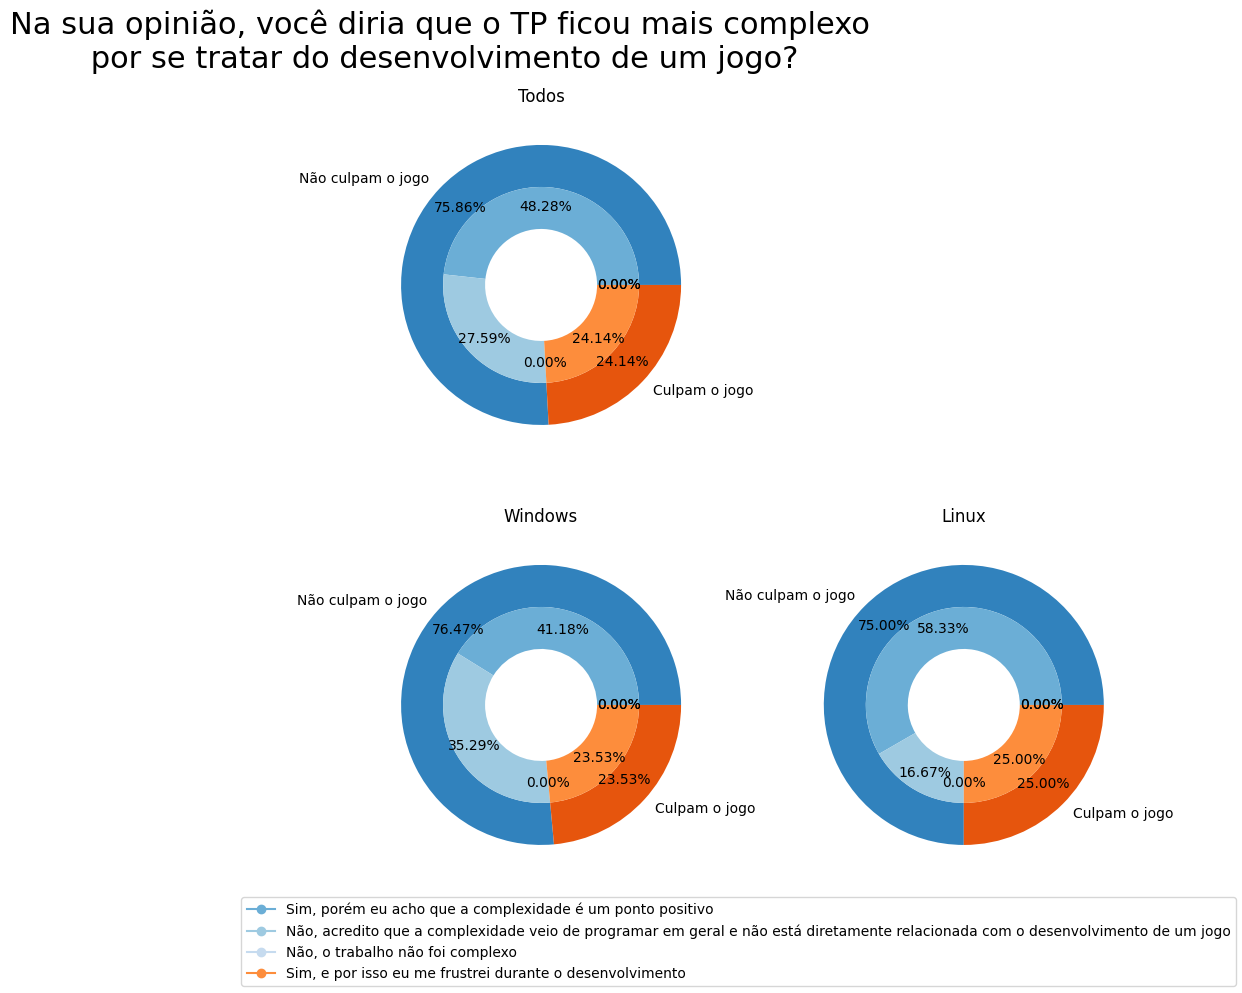

In [17]:
inner_labels = A_YES_FORTUNATELY, A_NO_NOT_THE_GAME, A_NO_NOT_COMPLEX, A_YES_UNFORTUNATELY
inner_colors = cmap([1, 2, 3, 5])

outer_labels = "Não culpam o jogo", "Culpam o jogo"
outer_colors = cmap([0, 4])

inner_radius = 0.7
outer_radius = 1.0

answer_indices = [A_YES_FORTUNATELY, A_NO_NOT_THE_GAME, A_NO_NOT_COMPLEX], [A_YES_UNFORTUNATELY]

# -------

fig, ((general_ax, placeholder_ax), (windows_ax, linux_ax)) = plt.subplots(2, 2, figsize=(10, 10))

half_length = len(Q_MORE_COMPLEX)//2
half_space_idx = Q_MORE_COMPLEX[half_length:].find(" ") + half_length
wrapped_title = Q_MORE_COMPLEX[:half_space_idx] + "\n" + Q_MORE_COMPLEX[half_space_idx:]

fig.suptitle(wrapped_title, x=0.2, fontsize=22)

plot_stacked_pie_charts(general_ax, all_users, Q_MORE_COMPLEX, answer_indices, inner_colors, outer_colors, "Todos", outer_labels=outer_labels)
plot_stacked_pie_charts(windows_ax, windows_users, Q_MORE_COMPLEX, answer_indices, inner_colors, outer_colors, "Windows", outer_labels=outer_labels)
plot_stacked_pie_charts(linux_ax, linux_users, Q_MORE_COMPLEX, answer_indices, inner_colors, outer_colors, "Linux", outer_labels=outer_labels)

placeholder_ax.set_axis_off()

figure_wide_legend(fig, inner_colors, inner_labels, loc="lower right")

plt.show()

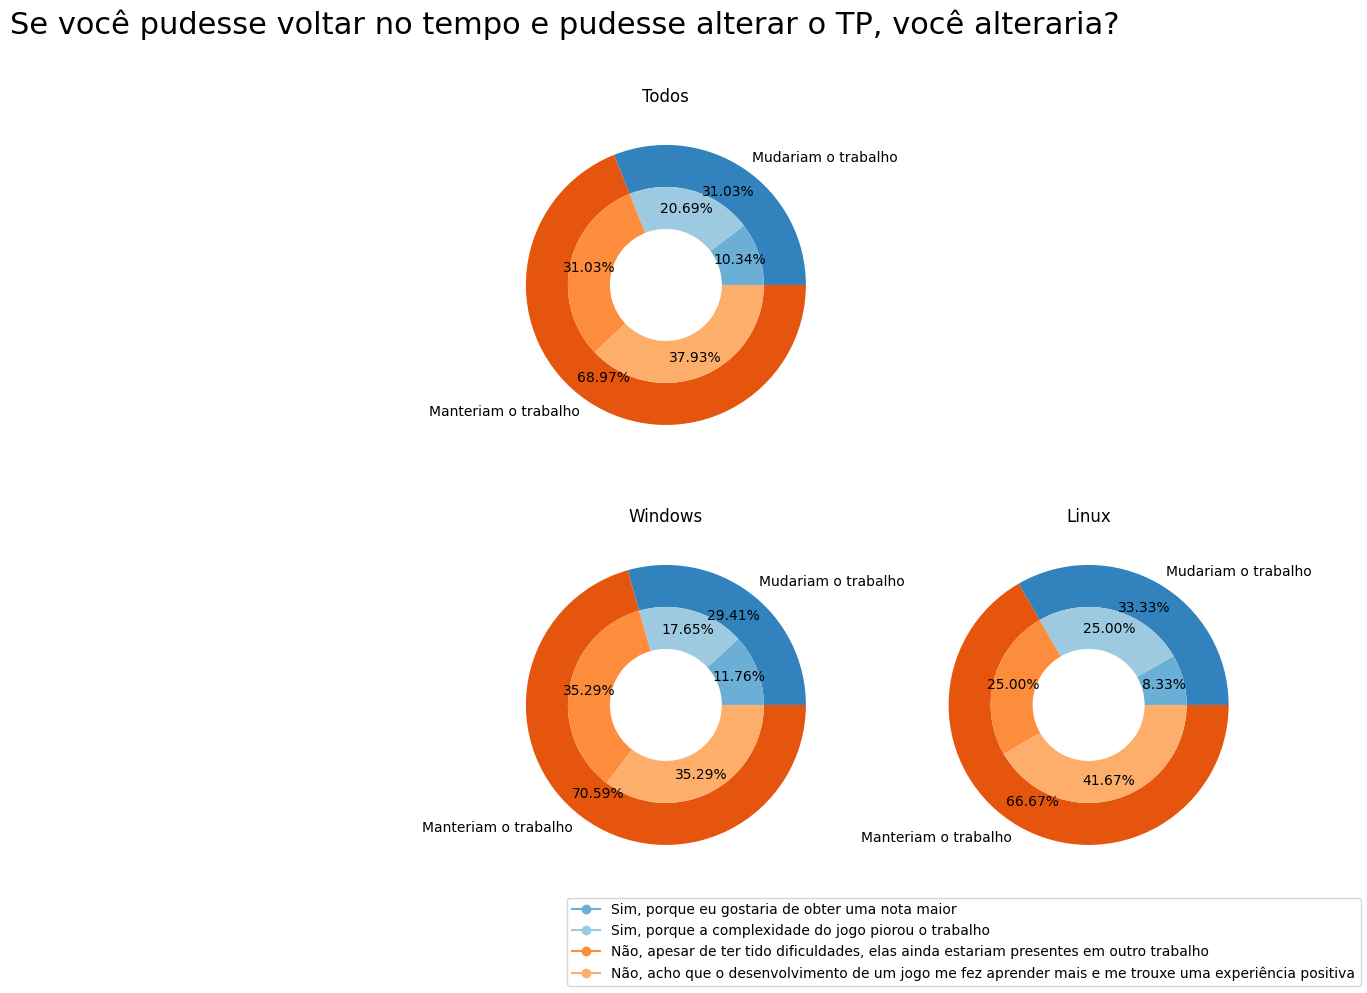

In [18]:
inner_labels = A_YES_BETTER_GRADE, A_YES_COMPLEXITY, A_NO_GAMES_NOT_TO_BLAME, A_NO_IM_HAPPY
inner_colors = cmap([1, 2, 5, 6])

outer_labels = "Mudariam o trabalho", "Manteriam o trabalho"
outer_colors = cmap([0, 4])

inner_radius = 0.7
outer_radius = 1.0

answer_indices = [A_YES_BETTER_GRADE, A_YES_COMPLEXITY], [A_NO_GAMES_NOT_TO_BLAME, A_NO_IM_HAPPY]

# -------

fig, ((general_ax, placeholder_ax), (windows_ax, linux_ax)) = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle(Q_TIME_TRAVEL[:Q_TIME_TRAVEL.find("\n")], x=0.2, fontsize=22)

plot_stacked_pie_charts(general_ax, all_users, Q_TIME_TRAVEL, answer_indices, inner_colors, outer_colors, "Todos", outer_labels=outer_labels)
plot_stacked_pie_charts(windows_ax, windows_users, Q_TIME_TRAVEL, answer_indices, inner_colors, outer_colors, "Windows", outer_labels=outer_labels)
plot_stacked_pie_charts(linux_ax, linux_users, Q_TIME_TRAVEL, answer_indices, inner_colors, outer_colors, "Linux", outer_labels=outer_labels)

placeholder_ax.set_axis_off()

figure_wide_legend(fig, inner_colors, inner_labels, loc="lower right")

plt.show()

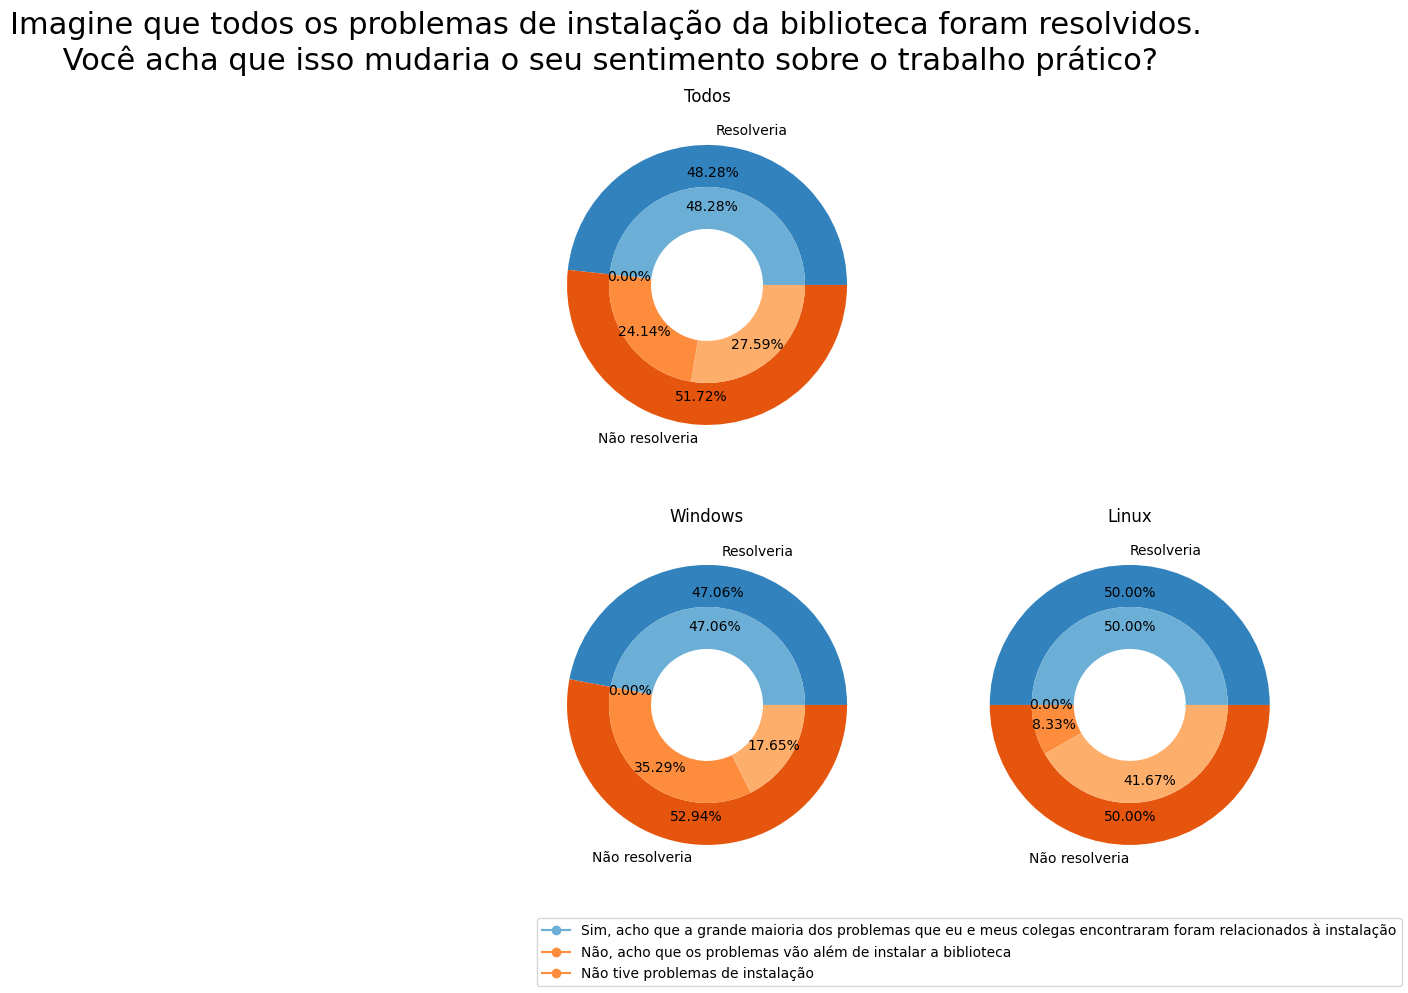

In [30]:
inner_labels = A_LIB_PROBLEMS_YES, A_LIB_PROBLEMS_NO, A_LIB_PROBLEMS_NA
inner_colors = cmap([1, 5, 5, 6])

outer_labels = "Resolveria", "Não resolveria"
outer_colors = cmap([0, 4])

inner_radius = 0.7
outer_radius = 1.0

answer_indices = [A_LIB_PROBLEMS_YES], [A_LIB_PROBLEMS_NO, A_LIB_PROBLEMS_NA]

# -------

fig, ((general_ax, placeholder_ax), (windows_ax, linux_ax)) = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(Q_LIB_PROBLEMS.replace(".", ".\n"), x=0.2, fontsize=22)

plot_stacked_pie_charts(general_ax, all_users, Q_LIB_PROBLEMS, answer_indices, inner_colors, outer_colors, "Todos", outer_labels=outer_labels)
plot_stacked_pie_charts(windows_ax, windows_users, Q_LIB_PROBLEMS, answer_indices, inner_colors, outer_colors, "Windows", outer_labels=outer_labels)
plot_stacked_pie_charts(linux_ax, linux_users, Q_LIB_PROBLEMS, answer_indices, inner_colors, outer_colors, "Linux", outer_labels=outer_labels)

placeholder_ax.set_axis_off()

figure_wide_legend(fig, inner_colors, inner_labels, loc="lower right")

plt.show()